<a href="https://colab.research.google.com/github/first-penguin-hub/rabbit_challenge/blob/main/2_4_optimizer_after.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

## Google Colab 用の処理

下記を実行します
- ドライブのマウント
- ノートブックファイルと同じフォルダへの移動

Googleドライブのマイドライブ を基準に DNN_code/DNN_code_colab_day2 フォルダを置くことを仮定しています。必要に応じて，パスを変更してください．

In [1]:
# Google Colab での実行かを調べる
import sys
import os
ENV_COLAB = True  if 'google.colab' in sys.modules else False

# google drive のマウント
if ENV_COLAB:
  from google.colab import drive
  drive.mount('/content/drive')
  os.chdir('/content/drive/My Drive/StudyAI/DNN_code_colab_day2/notebook')

Mounted at /content/drive


## sys.pathの設定

In [2]:
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定

# optimizer

## SGD

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.11
                : 10. 正答率(テスト) = 0.1032
Generation: 20. 正答率(トレーニング) = 0.07
                : 20. 正答率(テスト) = 0.1032
Generation: 30. 正答率(トレーニング) = 0.12
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.07
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.09
                : 50. 正答率(テスト) = 0.1032
Generation: 60. 正答率(トレーニング) = 0.15
                : 60. 正答率(テスト) = 0.1032
Generation: 70. 正答率(トレーニング) = 0.13
                : 70. 正答率(テスト) = 0.1032
Generation: 80. 正答率(トレーニング) = 0.09
                : 80. 正答率(テスト) = 0.1032
Generation: 90. 正答率(トレーニング) = 0.13
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.17
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.1
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.11
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.09
                : 130. 正答率(テスト) = 0.1135
Generati

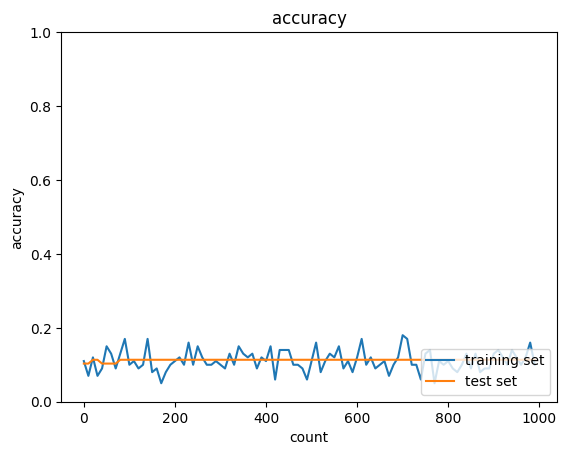

In [3]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet


# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================


network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)

    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)


    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Momentum

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12
                : 10. 正答率(テスト) = 0.098
Generation: 20. 正答率(トレーニング) = 0.12
                : 20. 正答率(テスト) = 0.0958
Generation: 30. 正答率(トレーニング) = 0.14
                : 30. 正答率(テスト) = 0.1028
Generation: 40. 正答率(トレーニング) = 0.11
                : 40. 正答率(テスト) = 0.0958
Generation: 50. 正答率(トレーニング) = 0.08
                : 50. 正答率(テスト) = 0.098
Generation: 60. 正答率(トレーニング) = 0.11
                : 60. 正答率(テスト) = 0.0958
Generation: 70. 正答率(トレーニング) = 0.24
                : 70. 正答率(テスト) = 0.1912
Generation: 80. 正答率(トレーニング) = 0.12
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.23
                : 90. 正答率(テスト) = 0.2026
Generation: 100. 正答率(トレーニング) = 0.16
                : 100. 正答率(テスト) = 0.2039
Generation: 110. 正答率(トレーニング) = 0.31
                : 110. 正答率(テスト) = 0.2339
Generation: 120. 正答率(トレーニング) = 0.27
                : 120. 正答率(テスト) = 0.248
Generation: 130. 正答率(トレーニング) = 0.26
                : 130. 正答率(テスト) = 0.2737
Generation

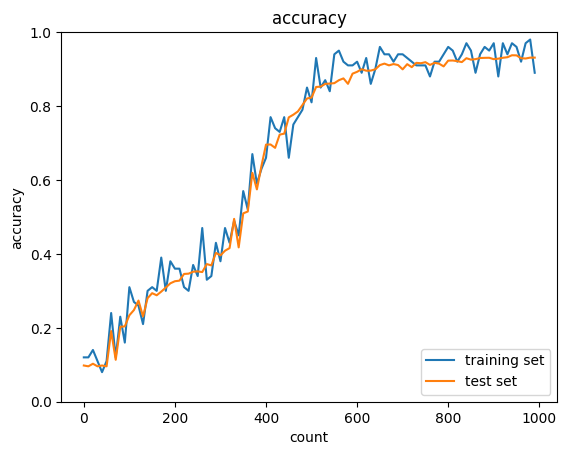

In [4]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.3
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)

    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## AdaGrad

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.09
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.07
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.13
                : 40. 正答率(テスト) = 0.127
Generation: 50. 正答率(トレーニング) = 0.18
                : 50. 正答率(テスト) = 0.1987
Generation: 60. 正答率(トレーニング) = 0.2
                : 60. 正答率(テスト) = 0.2562
Generation: 70. 正答率(トレーニング) = 0.25
                : 70. 正答率(テスト) = 0.2319
Generation: 80. 正答率(トレーニング) = 0.27
                : 80. 正答率(テスト) = 0.2363
Generation: 90. 正答率(トレーニング) = 0.25
                : 90. 正答率(テスト) = 0.24
Generation: 100. 正答率(トレーニング) = 0.34
                : 100. 正答率(テスト) = 0.2156
Generation: 110. 正答率(トレーニング) = 0.2
                : 110. 正答率(テスト) = 0.2352
Generation: 120. 正答率(トレーニング) = 0.36
                : 120. 正答率(テスト) = 0.2402
Generation: 130. 正答率(トレーニング) = 0.24
                : 130. 正答率(テスト) = 0.2347
Generation: 

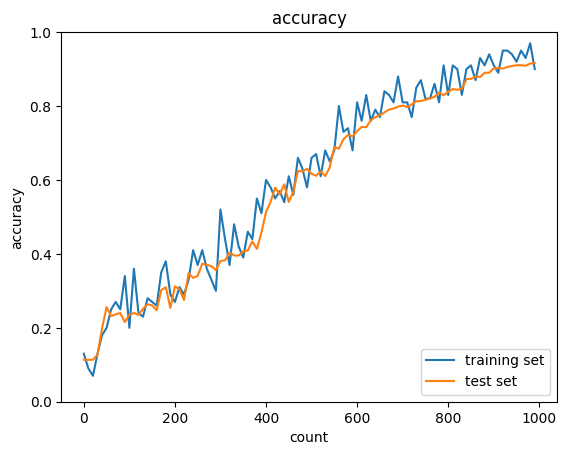

In [5]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.full_like(network.params[key], 1e-4)
        else:
            h[key] += np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]))

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)


    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## RMSprop

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.21
                : 10. 正答率(テスト) = 0.2007
Generation: 20. 正答率(トレーニング) = 0.16
                : 20. 正答率(テスト) = 0.2074
Generation: 30. 正答率(トレーニング) = 0.31
                : 30. 正答率(テスト) = 0.301
Generation: 40. 正答率(トレーニング) = 0.29
                : 40. 正答率(テスト) = 0.3116
Generation: 50. 正答率(トレーニング) = 0.52
                : 50. 正答率(テスト) = 0.3178
Generation: 60. 正答率(トレーニング) = 0.47
                : 60. 正答率(テスト) = 0.3986
Generation: 70. 正答率(トレーニング) = 0.46
                : 70. 正答率(テスト) = 0.429
Generation: 80. 正答率(トレーニング) = 0.63
                : 80. 正答率(テスト) = 0.537
Generation: 90. 正答率(トレーニング) = 0.71
                : 90. 正答率(テスト) = 0.6431
Generation: 100. 正答率(トレーニング) = 0.75
                : 100. 正答率(テスト) = 0.7254
Generation: 110. 正答率(トレーニング) = 0.82
                : 110. 正答率(テスト) = 0.7607
Generation: 120. 正答率(トレーニング) = 0.81
                : 120. 正答率(テスト) = 0.7858
Generation: 130. 正答率(トレーニング) = 0.79
                : 130. 正答率(テスト) = 0.8148
Generation

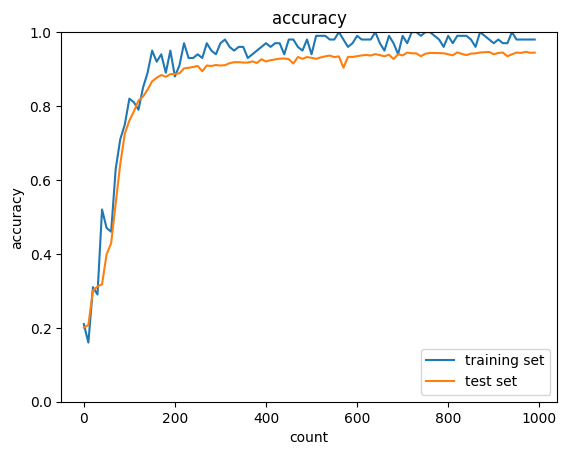

In [6]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
decay_rate = 0.99

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)

    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Adam

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12
                : 10. 正答率(テスト) = 0.1032
Generation: 20. 正答率(トレーニング) = 0.2
                : 20. 正答率(テスト) = 0.1389
Generation: 30. 正答率(トレーニング) = 0.26
                : 30. 正答率(テスト) = 0.205
Generation: 40. 正答率(トレーニング) = 0.22
                : 40. 正答率(テスト) = 0.1806
Generation: 50. 正答率(トレーニング) = 0.21
                : 50. 正答率(テスト) = 0.1979
Generation: 60. 正答率(トレーニング) = 0.2
                : 60. 正答率(テスト) = 0.196
Generation: 70. 正答率(トレーニング) = 0.2
                : 70. 正答率(テスト) = 0.2008
Generation: 80. 正答率(トレーニング) = 0.23
                : 80. 正答率(テスト) = 0.2109
Generation: 90. 正答率(トレーニング) = 0.24
                : 90. 正答率(テスト) = 0.2117
Generation: 100. 正答率(トレーニング) = 0.23
                : 100. 正答率(テスト) = 0.21
Generation: 110. 正答率(トレーニング) = 0.2
                : 110. 正答率(テスト) = 0.2095
Generation: 120. 正答率(トレーニング) = 0.19
                : 120. 正答率(テスト) = 0.208
Generation: 130. 正答率(トレーニング) = 0.14
                : 130. 正答率(テスト) = 0.2095
Generation: 140.

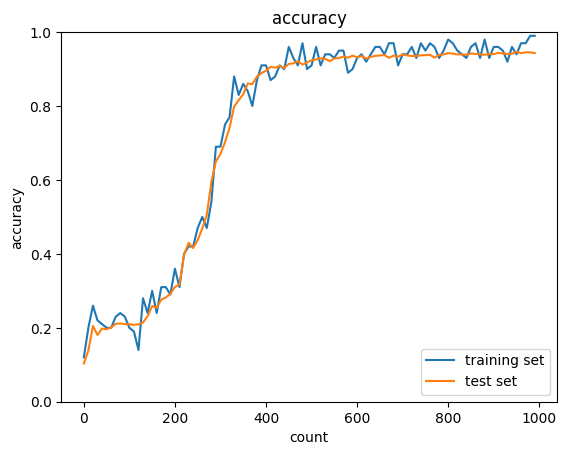

In [7]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])

        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)

    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] 活性化関数と重みの初期化方法を変更して違いを見てみよう
初期状態ではsigmoid - gauss<br>
activationはReLU、weight_init_stdは別の数値や'Xavier'・'He'に変更可能

## [try] バッチ正規化をして変化を見てみよう
use_batchnormをTrueにしよう

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------